In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

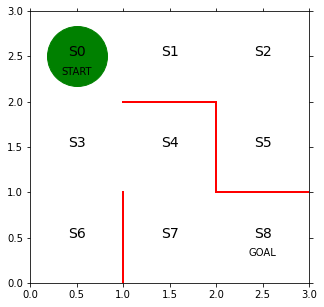

In [2]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)
plt.plot([2,2],[2,1], color='red', linewidth=2)
plt.plot([2,3],[1,1], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both',which='both',bottom='off',top='off',labelbottom='off',right='off',left='off',labelleft='off')

line, = ax.plot([0.5],[2.5],marker="o", color='g', markersize=60)

In [3]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
[np.nan, 1, np.nan, 1],
[np.nan, np.nan, 1, 1],
[1, 1, 1, np.nan],
[np.nan, np.nan, 1, 1],
[1, np.nan, np.nan, np.nan],
[1, np.nan, np.nan, np.nan],
[1, 1, np.nan, np.nan],
])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [7]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [8]:
def goal_maze(pi):
    s = 0
    state_history = [0]

    while (1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)

        if next_s == 8:
            break
        else:
            s = next_s

    return state_history

In [9]:
state_history = goal_maze(pi_0)

In [10]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")

[0, 3, 4, 7, 8]
迷路を解くのにかかったステップ数は4です


In [11]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [12]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m,n] = theta.shape
    pi = np.zeros((m,n))

    exp_theta = np.exp(beta * theta)

    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [13]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [14]:
def get_acrion_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1

    return [action, s_next]

In [15]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]

    while (1):
        [action, next_s] = get_acrion_and_next_s(pi, s)
        s_a_history[-1][1] = action

        s_a_history.append([next_s, np.nan])

        if next_s == 8:
            break
        else:
            s = next_s

    return s_a_history

In [16]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 0], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0],

In [17]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1

    [m, n] = theta.shape
    delta_theta = theta.copy()

    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):

                SA_i = [SA for SA in s_a_history if SA[0] == i]

                SA_ij = [SA for SA in s_a_history if SA == [i,j]]

                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i,j] = (N_ij - pi[i,j] * N_i) / T

    new_theta = theta + eta * delta_theta
    
    return new_theta

In [18]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50096154 0.49903846 0.        ]
 [0.         0.49884616 0.         0.50115384]
 [0.         0.         0.49903846 0.50096154]
 [0.33367425 0.33213776 0.33418799 0.        ]
 [0.         0.         0.49961538 0.50038462]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [19]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)

    print(np.sum(np.abs(new_pi - pi)))
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.048655064592875996
迷路を解くのにかかったステップ数は4です
0.017504061692574346
迷路を解くのにかかったステップ数は14です
0.01718000120097346
迷路を解くのにかかったステップ数は72です
0.03374787790743078
迷路を解くのにかかったステップ数は16です
0.013917144328131514
迷路を解くのにかかったステップ数は36です
0.010637307376876015
迷路を解くのにかかったステップ数は48です
0.03225604925633241
迷路を解くのにかかったステップ数は6です
0.011519064351965702
迷路を解くのにかかったステップ数は50です
0.005232997496771696
迷路を解くのにかかったステップ数は48です
0.00760306334069083
迷路を解くのにかかったステップ数は62です
0.03984232247626951
迷路を解くのにかかったステップ数は6です
0.020161209744201825
迷路を解くのにかかったステップ数は36です
0.0065505588703330675
迷路を解くのにかかったステップ数は92です
0.047431896264166884
迷路を解くのにかかったステップ数は4です
0.006187519301340205
迷路を解くのにかかったステップ数は116です
0.01036340879551978
迷路を解くのにかかったステップ数は88です
0.02757996717394623
迷路を解くのにかかったステップ数は20です
0.00810279004397585
迷路を解くのにかかったステップ数は138です
0.018720923369277664
迷路を解くのにかかったステップ数は76です
0.047152893790535166
迷路を解くのにかかったステップ数は4です
0.012108869434660163
迷路を解くのにかかったステップ数は108です
0.007869941886177123
迷路を解くのにかかったステップ数は30です
0.011323648633774552
迷路を解くのにかかったステップ数は36です
0.012892592402586556

In [20]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.014 0.986 0.   ]
 [0.    0.26  0.    0.74 ]
 [0.    0.    0.445 0.555]
 [0.008 0.982 0.01  0.   ]
 [0.    0.    0.979 0.021]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.013 0.987 0.    0.   ]]


In [21]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [47]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [48]:
def simple_convert_into_pi_from_theta(theta):

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [49]:
print(pi_0)

[[0.    0.5   0.5   0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.333 0.333 0.333 0.   ]
 [0.    0.    0.5   0.5  ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.5   0.5   0.    0.   ]]


In [50]:
def get_action(s, Q, epsilon, pi_0):
    direction = ["up","right","down","left"]

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up","right","down","left"]
    next_direction = direction[a]

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [51]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [52]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while(1):
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        if s_next == 8:
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [53]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    episode = episode + 1
    if episode > 100:
        break

エピソード:1
1.5158744608639352
迷路を解くのにかかったステップ数は394です
エピソード:2
0.8855063088511175
迷路を解くのにかかったステップ数は782です
エピソード:3
0.08132313098812488
迷路を解くのにかかったステップ数は10です
エピソード:4
0.07653532622960346
迷路を解くのにかかったステップ数は4です
エピソード:5
0.07570478147289804
迷路を解くのにかかったステップ数は4です
エピソード:6
0.07478816930699063
迷路を解くのにかかったステップ数は4です
エピソード:7
0.07376792887364486
迷路を解くのにかかったステップ数は4です
エピソード:8
0.07263435634887452
迷路を解くのにかかったステップ数は4です
エピソード:9
0.07138394310485066
迷路を解くのにかかったステップ数は4です
エピソード:10
0.0700179860351641
迷路を解くのにかかったステップ数は4です
エピソード:11
0.06854143121633641
迷路を解くのにかかったステップ数は4です
エピソード:12
0.06696191714116123
迷路を解くのにかかったステップ数は4です
エピソード:13
0.06528898820423154
迷路を解くのにかかったステップ数は4です
エピソード:14
0.06353345301835589
迷路を解くのにかかったステップ数は4です
エピソード:15
0.06170686555610361
迷路を解くのにかかったステップ数は4です
エピソード:16
0.059821110099986724
迷路を解くのにかかったステップ数は4です
エピソード:17
0.05788807359801815
迷路を解くのにかかったステップ数は4です
エピソード:18
0.05591939130318466
迷路を解くのにかかったステップ数は4です
エピソード:19
0.05392625356529834
迷路を解くのにかかったステップ数は4です
エピソード:20
0.051919263376815905
迷路を解くのにかかったステップ数は4です
エピソード

In [54]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [55]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:
        Q[s,a] = Q[s,a] + eta * (r - Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta * (r + gamma * np.nanmax(Q[s_next,:]) - Q[s,a])

    return Q

In [56]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1

In [57]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    episode = episode + 1
    if episode > 100:
        break

エピソード:1
0.2767630984708792
迷路を解くのにかかったステップ数は460です
エピソード:2
0.13175113139371636
迷路を解くのにかかったステップ数は226です
エピソード:3
0.09521608663692416
迷路を解くのにかかったステップ数は6です
エピソード:4
0.09402135388733612
迷路を解くのにかかったステップ数は4です
エピソード:5
0.09302563125030161
迷路を解くのにかかったステップ数は4です
エピソード:6
0.09203354923633854
迷路を解くのにかかったステップ数は4です
エピソード:7
0.09103275910941629
迷路を解くのにかかったステップ数は4です
エピソード:8
0.09001021394569167
迷路を解くのにかかったステップ数は4です
エピソード:9
0.08895327384256717
迷路を解くのにかかったステップ数は4です
エピソード:10
0.08785045996627636
迷路を解くのにかかったステップ数は4です
エピソード:11
0.08669193561766748
迷路を解くのにかかったステップ数は4です
エピソード:12
0.08546977794265742
迷路を解くのにかかったステップ数は4です
エピソード:13
0.08417809178525595
迷路を解くのにかかったステップ数は4です
エピソード:14
0.08281300710285117
迷路を解くのにかかったステップ数は4です
エピソード:15
0.0813725930159577
迷路を解くのにかかったステップ数は4です
エピソード:16
0.07985671467521958
迷路を解くのにかかったステップ数は4です
エピソード:17
0.07826685346484387
迷路を解くのにかかったステップ数は4です
エピソード:18
0.07660590642622273
迷路を解くのにかかったステップ数は4です
エピソード:19
0.07487797701043092
迷路を解くのにかかったステップ数は4です
エピソード:20
0.07308816621118222
迷路を解くのにかかったステップ数は4です
エピソード:2

In [59]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line, = ax.plot([0.5],[2.5],marker="s",color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5],[2.5],marker="s",color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5],[2.5],marker="s",color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5],[1.5],marker="s",color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5],[1.5],marker="s",color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5],[1.5],marker="s",color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5],[0.5],marker="s",color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5],[0.5],marker="s",color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5],[0.5],marker="s",color=cm.jet(1.0), markersize=85)

    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

anim.save('anim2.mp4', writer="ffmpeg")